## Importing Necessary Library

In [1]:
#Basic library

%matplotlib inline
import csv
import numpy as np
import pandas as pd
import string
import re
import math
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
#importing the library for model building

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import NMF
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder

In [3]:
#library for NLP
import os
import pickle
import sys
from IPython.display import display, HTML
import urllib
import gzip
import nltk
import nltk.stem
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import pip

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Preprocessing of Data

1. cleanString() function clean the data both incoming and our train data.
2. stopwords used here to remove the redundant word from our sentences.
3. lematizer used here to remove the verb,adjective form inorder to provide the required word from the sentence.
4. also all the sentences are converted to one similar format(here converted to lower). 

In [4]:
def cleanString(review):
    stopWords = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    returnString = ""
    sentence_token = tokenize.word_tokenize(review)
    idx_list = []
    for j in range(len(sentence_token)):
        single_sentence = tokenize.word_tokenize(sentence_token[j])
        single_sentence=[lemmatizer.lemmatize(t) for t in single_sentence]
        single_sentence=[word for word in single_sentence if word.lower() not in stopWords]
        sentences_filtered = [(idx,lemmatizer.lemmatize(w.lower())) for idx,w in enumerate(single_sentence) 
                              if w.lower() not in stopWords and w.isalnum()]
        idx_list.append([x[0] for x in sentences_filtered])
        word_list = [x[1] for x in sentences_filtered]
        returnString = returnString + ' '.join(word_list) + ' '
    
    return returnString
def cleanData(string1):
    articles = []
    n = 1
    for i in range(n):
        temp_string = cleanString(string1)
        articles.append(temp_string)
        print(str(i+1)+' of '+str(n)+" articles cleaned.",end='\r')
    
    return(articles)
def tokenize_test(model,train,validation):

    lsa = TruncatedSVD(n_components=200)
    X_test1 = char_vectorizer.transform(validation)
    X_test2 = word_vectorizer.transform(validation)
    test_stack = hstack([X_test1,X_test2])
    #train_text = vect.fit_transform(train["Text"])
    #print ('Features: ', train_text.shape[1])
    #test_text = vect.transform(validation["Text"])
    train_features2 = Normalizer(copy=False).fit_transform(train_features1)
    
    test_stack = Normalizer(copy=False).transform(test_stack)
    model.fit(train_features2, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    #word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    #char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    #X_test1 = word_model.transform(clntxt)
    #X_test2 = char_model.transform(clntxt)
    #test_stack = hstack([X_test1,X_test2])
    svd_model=pickle.load( open( "Pyhton_SVD_preprocessing.sav", "rb" ) )
    test_stack=svd_model.transform(test_stack)
    best_thread = pairwise_distances_argmin(
            X=test_stack,
            Y=train_features2,
            metric='cosine'
        )
    print(best_thread)
    y_pred_class1 = model.predict(train_features2[best_thread])
    y_pred_class2 = model.predict(test_stack)
    print(y_pred_class1,y_pred_class2)
    #return(y_pred_class1,y_pred_class2)
    y_pred_class = model.predict(test_stack)
    
    print("Training Accuracy")
    print(model.score(train_features2,y_train))
    print("Testing Accuracy1")
    print(model.score(test_stack,y_test1))
    print("Testing Accuracy2")
    print(model.score(train_features1[best_thread],y_test1))
    #print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
    #print(classification_report(np.argmax(y_test,axis=1),y_pred_class,target_names=list(labelEncoder.classes_)))
    
    
    cm = ConfusionMatrix(model, classes=list(labelEncoder.classes_))



#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
    cm.score(test_stack, y_test1)

#How did we do?
    cm.poof()
    #print(confusion_matrix(y_pred_class,validation["Code"]))

def tokenize_test2(model,train,text):
    from sklearn.decomposition import NMF
    from sklearn.preprocessing import Normalizer
    print(text)
    X_test1 = char_vectorizer.transform(text)
    X_test2 = word_vectorizer.transform(text)
    test_stack = hstack([X_test1,X_test2])
    train_features = Normalizer(copy=False).fit_transform(train_features1)
    test_stack = Normalizer(copy=False).transform(test_stack)
    model.fit(train_features, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred_class = model.predict(test_stack)
    return(y_pred_class)
def tokenize_test3(text):
    print(text)
    clntxt=cleanData(text)
    word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    X_test1 = word_model.transform(clntxt)
    X_test2 = char_model.transform(clntxt)
    test_stack = hstack([X_test1,X_test2])
    model = pickle.load( open( "model.sav", "rb" ) )
    y_pred_class = model.predict(test_stack)
    print(y_pred_class)

## Feature Engineering

1. TruncatedSVD used here to reduce the dimension inorder to get best performance of the model.(n_components=200,200 dimensions)
2. Character vectorizer and Word vectorizer both are used to get the vector form the tokenized word.We can use any vectorizer but here we used both for better performance of our model.
3. 'pickle' is used to load our model.
4. pairwise distance is used here on the basis of cosine similarity in order to find out the match between word.It also help model to find our the context which will help Model to find the proper response for a required question.
5. Normalizer is also used here to keep our data under one scale.

In [5]:
def tokenize_test(model,train,validation):

    lsa = TruncatedSVD(n_components=200)
    X_test1 = char_vectorizer.transform(validation)
    X_test2 = word_vectorizer.transform(validation)
    test_stack = hstack([X_test1,X_test2])
    #train_text = vect.fit_transform(train["Text"])
    #print ('Features: ', train_text.shape[1])
    #test_text = vect.transform(validation["Text"])
    train_features2 = Normalizer(copy=False).fit_transform(train_features1)
    
    test_stack = Normalizer(copy=False).transform(test_stack)
    model.fit(train_features2, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    #word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    #char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    #X_test1 = word_model.transform(clntxt)
    #X_test2 = char_model.transform(clntxt)
    #test_stack = hstack([X_test1,X_test2])
    svd_model=pickle.load( open( "Pyhton_SVD_preprocessing.sav", "rb" ) )
    test_stack=svd_model.transform(test_stack)
    best_thread = pairwise_distances_argmin(
            X=test_stack,
            Y=train_features2,
            metric='cosine'
        )
    print(best_thread)
    y_pred_class1 = model.predict(train_features2[best_thread])
    y_pred_class2 = model.predict(test_stack)
    print(y_pred_class1,y_pred_class2)
    #return(y_pred_class1,y_pred_class2)
    y_pred_class = model.predict(test_stack)
    
    print("Training Accuracy")
    print(model.score(train_features2,y_train))
    print("Testing Accuracy1")
    print(model.score(test_stack,y_test1))
    print("Testing Accuracy2")
    print(model.score(train_features1[best_thread],y_test1))
    #print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
    #print(classification_report(np.argmax(y_test,axis=1),y_pred_class,target_names=list(labelEncoder.classes_)))
    
    
    cm = ConfusionMatrix(model, classes=list(labelEncoder.classes_))



#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
    cm.score(test_stack, y_test1)

#How did we do?
    cm.poof()
    #print(confusion_matrix(y_pred_class,validation["Code"]))

def tokenize_test2(model,train,text):
    from sklearn.decomposition import NMF
    from sklearn.preprocessing import Normalizer
    print(text)
    X_test1 = char_vectorizer.transform(text)
    X_test2 = word_vectorizer.transform(text)
    test_stack = hstack([X_test1,X_test2])
    train_features = Normalizer(copy=False).fit_transform(train_features1)
    test_stack = Normalizer(copy=False).transform(test_stack)
    model.fit(train_features, y_train)
    filename = 'model.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred_class = model.predict(test_stack)
    return(y_pred_class)
def tokenize_test3(text):
    print(text)
    clntxt=cleanData(text)
    word_model = pickle.load( open( "word_preprocessing.sav", "rb" ) )
    char_model = pickle.load( open( "char_preprocessing.sav", "rb" ) )
    X_test1 = word_model.transform(clntxt)
    X_test2 = char_model.transform(clntxt)
    test_stack = hstack([X_test1,X_test2])
    model = pickle.load( open( "model.sav", "rb" ) )
    y_pred_class = model.predict(test_stack)
    print(y_pred_class)

## Importing Our Main Corpous

In [6]:
stats=pd.read_csv('ALL.csv')
stats.head()

,Sub_Topic_Code,Question
0,Python Introduction,I want to know about Python
1,Python Introduction,What is Python
2,Python Introduction,I Want to understand Python
3,Python Introduction,what is python ecosystem
4,Python Introduction,whether python ecosystem is well supported


## Data preparation for Model Building

1. Feature encoding is carried out to change the sub_topic_code into respective Label.
2. labelEncoder.pickle is used to load it into model.
3. Sampling of data also done in order to get all the sub_topic in equal proportion.
4. Dataset is splited into train set and test set.
5. StemmedTfidfVectorizer is used here to convert word or character to its respective vector.It is also an advanced version of TfidfVectorizer.
6. We are used both word_vectorizer and Character_vectorizer for better performance.

In [15]:
#stats=pd.read_excel('Ensemble.xlsx',encoding =  "ISO-8859-1")
stats=pd.read_csv('ALL.csv')
#stats.columns=["Topic_Code","Sub_Topic_Code","Topic_Name","Question"]
labelEncoder = LabelEncoder()
stats["Topic_Name"] = labelEncoder.fit_transform(stats["Sub_Topic_Code"])


import pickle

with open('labelEncoder.pickle', 'wb') as file:
    pickle.dump(labelEncoder, file, pickle.HIGHEST_PROTOCOL)
stats = stats.rename(columns={'Topic_Name': 'Category', 'Question': 'Text'})
data_df=stats.sample(frac=1).reset_index(drop=True)
data_df["Text"]=data_df.Text.apply(cleanString)
y=data_df["Category"]
X=data_df["Text"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)
def build_tokenizer(doc):
    token_pattern=r"(?u)\b\w+"
    token_pattern = re.compile(token_pattern)
    return token_pattern.findall(doc)


english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc:(english_stemmer.stem(word) for word in analyzer(doc))
    
posts_root1=[]

for post in X_train:
    a=" ".join([english_stemmer.stem(word) for word in build_tokenizer(post)])
    posts_root1.append(a)

word_vectorizer = StemmedTfidfVectorizer(
    sublinear_tf=True,
    stop_words = 'english',
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1,3),
    norm='l1',
    dtype=np.float32,
    max_features=10000,
    
)
# Character Stemmer
char_vectorizer = StemmedTfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 10),
    dtype=np.float32,
    norm='l1',
    max_features=20000,
   
)



word_vectorizer.fit(posts_root1)
char_vectorizer.fit(posts_root1)


train_word_features = word_vectorizer.transform(posts_root1)
train_char_features = char_vectorizer.transform(posts_root1)



train_features = hstack([
    train_char_features,
    train_word_features])
tsvd=TruncatedSVD(2000)
train_features1 = tsvd.fit_transform(train_features)

filename = 'Python_word_preprocessing.sav'
pickle.dump(word_vectorizer, open(filename, 'wb'))
filename = 'Pyhton_char_preprocessing.sav'
pickle.dump(char_vectorizer, open(filename, 'wb'))
filename = 'Pyhton_SVD_preprocessing.sav'
pickle.dump(tsvd, open(filename, 'wb'))


print("char_feature_name:%s" % len(char_vectorizer.get_feature_names()))
print("word_feature_name:%s" % len(word_vectorizer.get_feature_names()))


char_feature_name:19078
word_feature_name:1270


## Model Performance :

### a) with NeuralNetwork Classifier

[251 306 169  13  91 174 170 201 172 338  24 338 149 111 258  95 148  95
 359 169  24   5 306 199  76 164  53 146 298 352 113 301 233 216 332  91
 179 321 330  10 220 345   0   4  63 172 277 229 187  36 102 113 148 346
 149 247 357 187 172 322  71 295 315 157  47 233 146  26 104 113 301 226
 219 315  52 216 243 332  17  17 359 169 251 165 277  70  94 298 264 298
  10 106 219 216 242 261  70]
[28 51 51 20 15 51 51 17 40 16 45 16 13 13 28 51 13 51 33 51 45 30 51 30
 26 26 52 16 30 30 51 13 45 16 14 15 20 18 30 48 30 32 39 18 20 40 18 16
 33 26 52 51 13 45 13 40 13 33 40 11 11 13 17 30 28 45 16 30 21 51 13 28
 51 17 32 16 23 14 23 23 33 51 28 13 18 23 15 30 29 30 48 26 51 16 28 28
 23] [28 51 51 20 15 51 51 17 52 16 45 16 13 13 28 51 13 51 28 51 45 30 51 30
 26 26 52 16 30 30 51 13 45 16 14 15 20 18 30 48 30 32 39 18 20 23 18 16
 33 26 52 51 13 45 13 40 13 33 40 11 11 13 17 30 39 45 16 30  0 51 13 28
 51 17 32 16 23 14 23 23 33 23 28 13 18 23 15 30 23 30 48 26 51 16 28 28
 23]
Training Ac

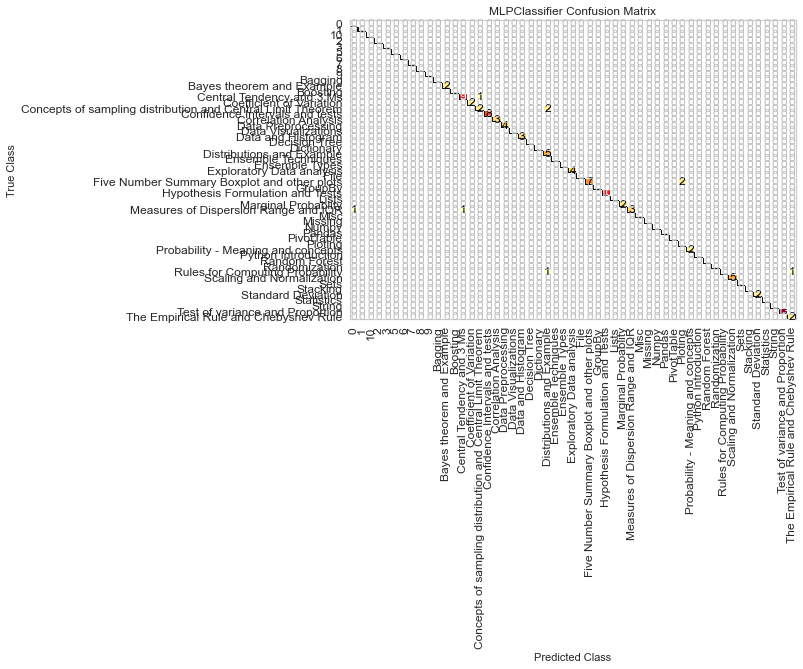

In [9]:
#stats1=pd.read_excel('Ensemble.xlsx',encoding =  "ISO-8859-1")
stats1=pd.read_csv('Statistics.csv')
#stats.columns=["Topic_Code","Sub_Topic_Code","Topic_Name","Question"]
stats1["Sub_Topic_Code"] = labelEncoder.transform(stats1["Sub_Topic_Code"])
stats1 = stats1.rename(columns={'Sub_Topic_Code': 'Category1', 'Question': 'Text'})
data_df=stats1.sample(frac=1).reset_index(drop=True)
data_df["Text"]=data_df.Text.apply(cleanString)
y=data_df["Category1"]
X=data_df["Text"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.9, random_state=23)
mlp=MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.75,
              beta_2=0.8, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=200, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
from sklearn.metrics.pairwise import pairwise_distances_argmin
tokenize_test(mlp,X_train1,X_test1)

In [11]:
# printing the predicted class
y_test1.head()

87    28
52    51
46    51
95    20
88    15
Name: Category1, dtype: int32

### b) With regularised Randomforest

[251 306 169  13  91 174 170 201 172 338  24 338 149 111 258  95 148  95
 359 169  24   5 306 199  76 164  53 146 298 352 113 301 233 216 332  91
 179 321 330  10 220 345   0   4  63 172 277 229 187  36 102 113 148 346
 149 247 357 187 172 322  71 295 315 157  47 233 146  26 104 113 301 226
 219 315  52 216 243 332  17  17 359 169 251 165 277  70  94 298 264 298
  10 106 219 216 242 261  70]
[28 51 51 20 15 51 51 17 40 16 45 16 13 13 28 51 13 51 33 51 45 30 51 30
 26 26 52 16 30 30 51 13 45 16 14 15 20 18 30 48 30 32 39 18 20 40 18 16
 33 26 52 51 13 45 13 40 13 33 40 11 11 13 17 30 28 45 16 30 21 51 13 28
 51 17 32 16 23 14 23 23 33 51 28 13 18 23 15 30 29 30 48 26 51 16 28 28
 23] [28 51 51 20 15 51 51 17 33 16 45 16 13 13 28 51 13 51  1 51 45 30 51 30
  0 26 52 16 30 30 51 13 45 51 14  0  0 18 30 33 30 32  7 18 20 32 18 16
 33  0  1 51 13 45 33  0 13 33 33 11 23 13 17 30  0 45 16 30  1 51 13 28
 51 17 32 16 23 33 23 23  1 51 28 13  7 23 15 30 51 30 48 26 51 16 28 28
 23]
Training Ac

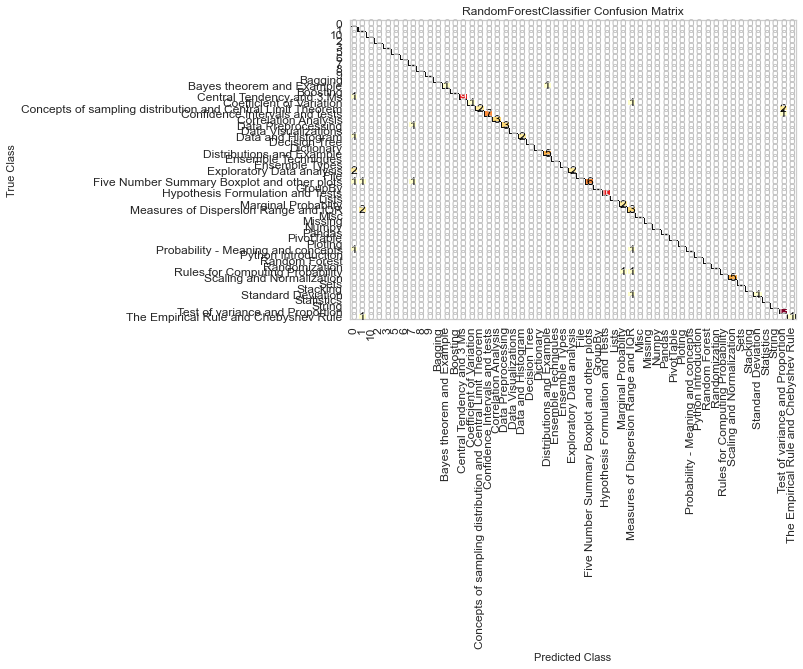

In [12]:
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=0.02,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=200,
                       verbose=0, warm_start=False)
tokenize_test(rf,X_train1,X_test1)

### c) Stochastic gradient descent (SGD) Classifier

[251 306 169  13  91 174 170 201 172 338  24 338 149 111 258  95 148  95
 359 169  24   5 306 199  76 164  53 146 298 352 113 301 233 216 332  91
 179 321 330  10 220 345   0   4  63 172 277 229 187  36 102 113 148 346
 149 247 357 187 172 322  71 295 315 157  47 233 146  26 104 113 301 226
 219 315  52 216 243 332  17  17 359 169 251 165 277  70  94 298 264 298
  10 106 219 216 242 261  70]
[28 51 51 28 11 51 51 17 28 16 45 16 13 49 28 51 13 51 23 51 45 27 51 30
 26 22 52 51 30 30 51 13 45 51 14 11 28 28 30 48 28 28 39 28 28 28 39 16
 33 26 52 51 13 45 13  1 13 33 28 11 11 13 17 30 28 45 51 30 28 51 13 39
 51 17 28 51 23 14 23 23 23 51 28 28 39 23 11 30 29 30 48 28 51 51 35 31
 23] [28 51 51 28 11 51 51 17 52 16 45 16 13 17 28 51 13 51 28 51 45 27 51 30
 26 28 52 51 30 30 51 13 45 51 14 28 28 28 30 48 28 28  8 28 28 23 39 16
 33 26 52 51 13 45 28  8 13 33 28 11 11 13 17 30 39 45 51 30 28 51 13 39
 51 17 28 51 23 28 23 23 23 51 28 28  8 23 11 30 51 30 48 28 51 51 35 31
 23]
Training Ac

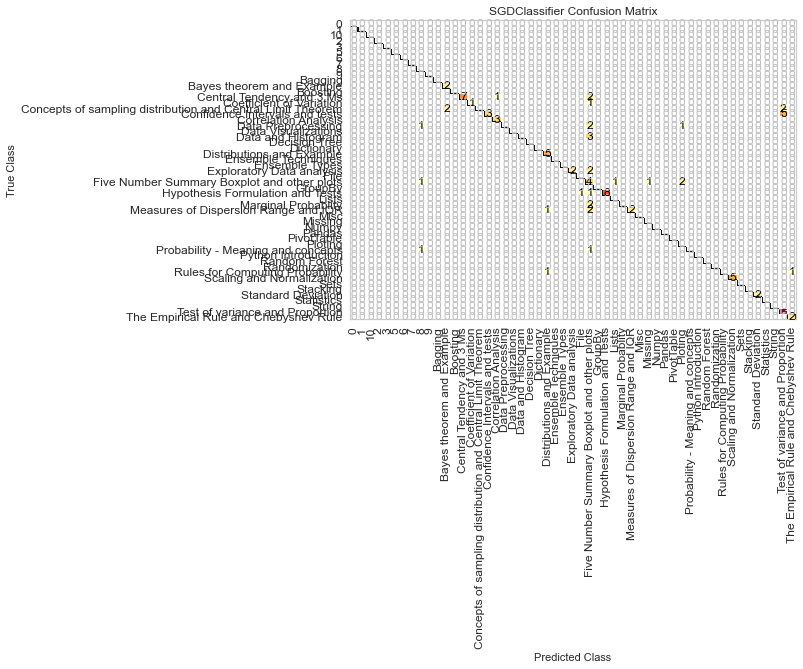

In [13]:
sgd=SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.2, learning_rate='optimal', loss='hinge', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=200, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
tokenize_test(sgd,X_train1,X_test1)

### d) With Voting Classifier

[251 306 169  13  91 174 170 201 172 338  24 338 149 111 258  95 148  95
 359 169  24   5 306 199  76 164  53 146 298 352 113 301 233 216 332  91
 179 321 330  10 220 345   0   4  63 172 277 229 187  36 102 113 148 346
 149 247 357 187 172 322  71 295 315 157  47 233 146  26 104 113 301 226
 219 315  52 216 243 332  17  17 359 169 251 165 277  70  94 298 264 298
  10 106 219 216 242 261  70]
[28 51 51 20 15 51 51 17 40 16 45 16 13 13 28 51 13 51 33 51 45 30 51 30
 26 26 52 16 30 30 51 13 45 16 14 15 20 18 30 48 30 32 39 18 20 40 18 16
 33 26 52 51 13 45 13 40 13 33 40 11 11 13 17 30 28 45 16 30 21 51 13 28
 51 17 32 16 23 14 23 23 33 51 28 13 18 23 15 30 29 30 48 26 51 16 28 28
 23] [28 51 51 20 15 51 51 17 52 16 45 16 13 13 28 51 13 51 28 51 45 30 51 30
 26 26 52 16 30 30 51 13 45 51 14  0  0 18 30 48 30 32  7 18 20 23 18 16
 33 26 52 51 13 45 13  0 13 33 28 11 11 13 17 30 39 45 16 30  0 51 13 28
 51 17 32 16 23 14 23 23  1 51 28 13  7 23 15 30 51 30 48 26 51 16 28 28
 23]
Training Ac

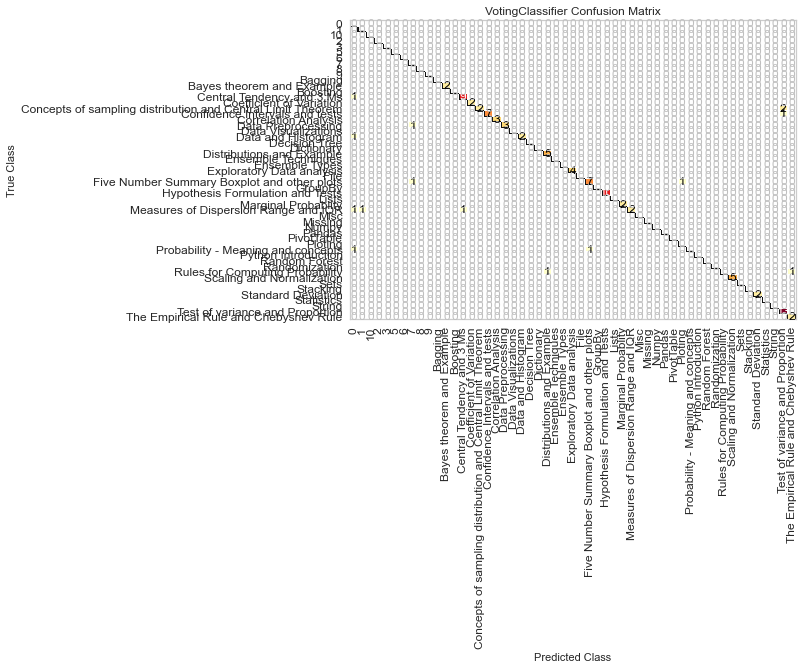

In [14]:
EnsembleClassifier = VotingClassifier(estimators = [ ('rf',rf),('mlp',mlp),('sgd1',sgd)], voting = 'hard', weights = [1,1,1])

tokenize_test(EnsembleClassifier,X_train1,X_test1)